# Rice Classification - Supervised Learning

**Introduction**: Rice is a staple food consumed by millions of people worldwide. It comes in various varieties, each with distinct characteristics such as grain size, color, aroma, and cooking properties. Ensuring accurate classification of rice types is essential for quality control, trade, and consumer satisfaction.


**Problem Statement**: Our goal is to develop a robust machine learning model that can accurately classify different types of rice based on their visual features. Given datasets of rice grains, the model should predict the correct rice variety.


**Method**: Building a model pipeline using sklearn, and find the best model hyperparameter using GridSearchCV


**Dataset**: This is a set of data created for rice classification from Kaggle (https://www.kaggle.com/datasets/mssmartypants/rice-type-classification). It is modified dataset from this resource: link Jasmine - 1, Gonen - 0. The explanantion of each features in the dataset are listed below:

Sure, here are descriptions for each term:

1. **id**: Identifier or unique identifier for each individual data point or sample.
2. **Area**: The total area or size of the object or particle being measured.
3. **MajorAxisLength**: The length of the major axis of the object, typically the longest dimension.
4. **MinorAxisLength**: The length of the minor axis of the object, typically the shortest dimension.
5. **Eccentricity**: A measure of how elongated or stretched out the shape of the object is, ranging from 0 (perfectly circular) to 1 (highly elongated).
6. **ConvexArea**: The area of the smallest convex polygon that encloses the object.
7. **EquivDiameter**: The diameter of a circle with the same area as the object.
8. **Extent**: The ratio of the area of the object to the area of the bounding box that encloses it, providing a measure of how much the object fills the bounding box.
9. **Perimeter**: The total length of the boundary or perimeter of the object.
10. **Roundness**: A measure of how closely the shape of the object resembles a circle, often calculated as the ratio of the area of the object to the area of a circle with the same perimeter.
11. **AspectRatio**: The ratio of the length of the major axis to the length of the minor axis, providing a measure of the elongation or orientation of the object.
12. **Class**: The category or label assigned to the object, typically used in classification tasks to denote the class or group to which the object belongs. Jasmine - 1, Gonen - 0

### Import Library

Let's import the required libraries and packages

In [25]:
import pandas as pd
import random
import numpy as np
from numpy.random import rand
from numpy.random import randint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Import the Datasets and Explore (EDA)

Let's import the rice classification dataset downloaded from Kaggle. 
The descriptions for each column:

1. **id**: Identifier or unique identifier for each individual data point or sample.
2. **Area**: The total area or size of the object or particle being measured.
3. **MajorAxisLength**: The length of the major axis of the object, typically the longest dimension.
4. **MinorAxisLength**: The length of the minor axis of the object, typically the shortest dimension.
5. **Eccentricity**: A measure of how elongated or stretched out the shape of the object is, ranging from 0 (perfectly circular) to 1 (highly elongated).
6. **ConvexArea**: The area of the smallest convex polygon that encloses the object.
7. **EquivDiameter**: The diameter of a circle with the same area as the object.
8. **Extent**: The ratio of the area of the object to the area of the bounding box that encloses it, providing a measure of how much the object fills the bounding box.
9. **Perimeter**: The total length of the boundary or perimeter of the object.
10. **Roundness**: A measure of how closely the shape of the object resembles a circle, often calculated as the ratio of the area of the object to the area of a circle with the same perimeter.
11. **AspectRatio**: The ratio of the length of the major axis to the length of the minor axis, providing a measure of the elongation or orientation of the object.
12. **Class**: The category or label assigned to the object, typically used in classification tasks to denote the class or group to which the object belongs. Jasmine - 1, Gonen - 0

In [4]:
# Add datasets
dataset = pd.read_csv("data/riceClassification.csv")
dataset.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
dataset.count()

id                 18185
Area               18185
MajorAxisLength    18185
MinorAxisLength    18185
Eccentricity       18185
ConvexArea         18185
EquivDiameter      18185
Extent             18185
Perimeter          18185
Roundness          18185
AspectRation       18185
Class              18185
dtype: int64

In [7]:
dataset.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [8]:
dataset.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

In [15]:
def data_preprocess(data, test_size):
  X = data.drop(columns =['id', 'Class'])
  y = data['Class']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)
  return X_train, X_test, y_train, y_test

In [16]:
X_train, X_test, y_train, y_test = data_preprocess(dataset, test_size = 0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16366, 10) (1819, 10) (16366,) (1819,)


### Sklearn Pipeline

A Scikit-learn (sklearn) pipeline is a powerful tool for streamlining the machine learning workflow. It allows you to combine multiple data processing steps and a machine learning model into a single object. A pipeline simplifies the process of transforming data and training a model by chaining together multiple steps.

It ensures that each step is executed in the correct order, avoiding common mistakes like **data leakage**.

Let's create pipeline

Let's first create a pipeline for Random Forest Model and Logistic Regression

In [18]:
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])


lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))  # Logistic Regression classifier
])

### Finding Best Hyperparameter - GridSearchCV

Machine learning models have parameters that are not learned from the data but are set before training. These are called hyperparameters.Properly chosen hyperparameters significantly impact model performance.

Finding the best hyperparameters is crucial for achieving optimal accuracy and generalization.

Grid Search CV (Cross-Validation) is a technique used for hyperparameter tuning in machine learning models. It also use the k-fold crossvalidation (cv) to determine the best hyperparameter.


Let's create a GridSearchCV

In [19]:
# First Defining hyperparameters for tuning

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],# number of tress
    'classifier__max_depth': [None, 10, 20]  #Maximum depth of each tree
 }


param_grid_lr = {
    'classifier__C': [0.1, 1, 10],  # Inverse regularization strength
}

In [20]:
# Second, create GridSearchCV
# defining the number of cv

grid_search_rf = GridSearchCV(estimator = rf_pipeline, param_grid = param_grid_rf, cv = 5, scoring = 'accuracy')

grid_search_lr = GridSearchCV(estimator = lr_pipeline, param_grid = param_grid_lr, cv = 5, scoring = 'accuracy')


### Model Training

Train the Random Forest and Logistic Regression using the GridSearchCV. The process takes longer time than the conventional model training.

In [21]:
# Let's fitting into X_train and y_train
grid_search_rf.fit(X_train, y_train)

grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             param_grid={'classifier__C': [0.1, 1, 10]}, scoring='accuracy')

In [22]:
# Check the best hyperparameters
best_params_rf = grid_search_rf.best_params_

best_params_lr = grid_search_lr.best_params_

In [23]:
# Choose the best hyperparameter model
best_model_rf = grid_search_rf.best_estimator_

best_model_lr = grid_search_lr.best_estimator_

In [24]:
# Test the best model on X_test

y_pred_rf = best_model_rf.predict(X_test)

y_pred_lr = best_model_lr.predict(X_test)

### Test using new sample dataset

In [58]:
class_cat = ['Gonen', 'Jasmine']

# Calling the standard scaler
scaler = StandardScaler()
# scaler.fit(X_train, y_train)

num_test = np.array(dataset.drop(columns=['id', 'Class']).iloc[0])
num_test = num_test.reshape(1,-1)

num_test = scaler.fit_transform(num_test)
num_test



array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [64]:
y_test_num_test = best_model_rf.predict(num_test)

print("predicted Class is " + class_cat[int(y_test_num_test)])

predicted Class is Jasmine


/home/mjanuadi/anaconda3/envs/image-dl/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Evaluate the Model

Let's evaluate the model to see its performance

In [28]:
print("Confusion Matrix Best Random Forest Model")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_rf

Confusion Matrix Best Random Forest Model
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       820
           1       0.99      0.99      0.99       999

    accuracy                           0.99      1819
   macro avg       0.99      0.99      0.99      1819
weighted avg       0.99      0.99      0.99      1819



array([[807,  13],
       [  6, 993]])

In [29]:
print("Confusion Matrix Best Logistic Regression Model")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)

cm_lr

Confusion Matrix Best Logistic Regression Model
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       820
           1       0.99      0.99      0.99       999

    accuracy                           0.99      1819
   macro avg       0.99      0.99      0.99      1819
weighted avg       0.99      0.99      0.99      1819



array([[806,  14],
       [  6, 993]])

In [30]:
nama_kelas = y_test.unique().tolist()
nama_kelas

[0, 1]

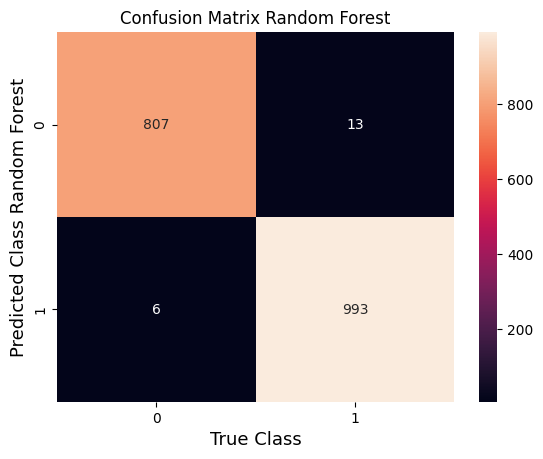

In [33]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='g', xticklabels = nama_kelas, yticklabels = nama_kelas)
plt.ylabel('Predicted Class Random Forest', fontsize=13)
plt.xlabel('True Class', fontsize=13)
plt.title('Confusion Matrix Random Forest')
plt.show()

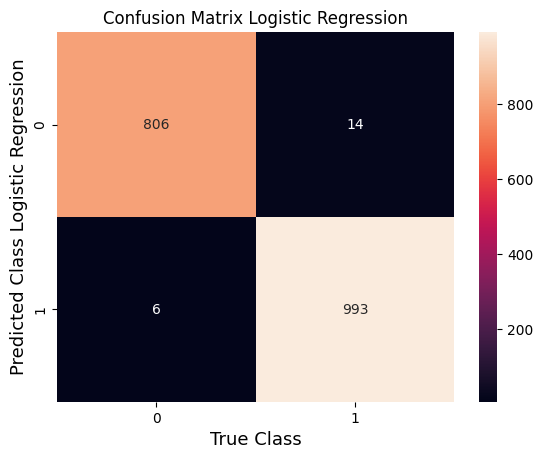

In [32]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='g', xticklabels = nama_kelas, yticklabels = nama_kelas)
plt.ylabel('Predicted Class Logistic Regression', fontsize=13)
plt.xlabel('True Class', fontsize=13)
plt.title('Confusion Matrix Logistic Regression')
plt.show()

### Result

Random Forest slightly outperforms logistic regression. Therefore, random forest model will be selected

### Save Model

Let's save our selected model using pickle

In [37]:
import pickle
pickle.dump(best_model_rf, open('model_selected.pkl', 'wb'))